In [1]:

import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
print(os.listdir("chest_xray\chest_xray"))

['.DS_Store', 'check', 'test', 'train', 'val']


In [2]:
print(os.listdir("chest_xray/chest_xray/train/"))
os.name

['.DS_Store', 'NORMAL', 'PNEUMONIA']


'nt'

In [3]:
TRAIN_DIR = "chest_xray/chest_xray/train/"  
TEST_DIR =  "chest_xray/chest_xray/test/"     

In [4]:
def get_label(Dir):
    for nextdir in os.listdir(Dir):
        if not nextdir.startswith('.'):
            if nextdir in ['NORMAL']:
                label = 0
            elif nextdir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
    return nextdir, label

In [5]:

def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['NORMAL']:
                label = 0
            elif nextDir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [6]:
#X_train, y_train = get_data(TRAIN_DIR)
import h5py
from keras .utils.np_utils import to_categorical
NUM_CLASSES=2
IMAGE_DIMS=(150,150,3)
file_name="X_train.h5"
try:
    with h5py.File(file_name) as hf:
        X_train,y_train=hf["imgs"][:],hf["labels"][:]
    print ("loaded image from {}".format(file_name))
except(IOError,OSError,KeyError):
    print("Error in reading {} . Processing all images..." .format(file_name))
    X_train,y_train=get_data(TRAIN_DIR)
    y_train=to_categorical(y_train,NUM_CLASSES)
    with h5py.File(file_name,"w") as hf:
        hf.create_dataset("imgs",data=X_train)
        hf.create_dataset("labels",data=y_train)

Using TensorFlow backend.
D:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

loaded image from X_train.h5


In [7]:
#X_test , y_test = get_data(TEST_DIR)

NUM_CLASSES=2
IMAGE_DIMS=(150,150,3)
file_name="X_test.h5"
try:
    with h5py.File(file_name) as hf:
        X_test,y_test=hf["imgs"][:],hf["labels"][:]
    print ("loaded image from {}".format(file_name))
except(IOError,OSError,KeyError):
    print("Error in reading {} . Processing all images..." .format(file_name))
    X_test,y_test=get_data(TEST/_DIR)
    y_test=to_categorical(y_test,NUM_CLASSES)
    with h5py.File(file_name,"w") as hf:
        hf.create_dataset("imgs",data=X_test)
        hf.create_dataset("labels",data=y_test)

loaded image from X_test.h5


D:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:7: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  import sys


In [8]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [9]:
print(X_train.shape,'\n',X_test.shape)

(5216, 150, 150, 3) 
 (624, 150, 150, 3)


In [10]:
print(y_train.shape,'\n',y_test.shape)

(5216, 2) 
 (624, 2)


In [12]:
print(y_train.shape,'\n',y_test.shape)

(5216, 2) 
 (624, 2)


In [13]:
Pimages = os.listdir(TRAIN_DIR + "PNEUMONIA")
Nimages = os.listdir(TRAIN_DIR + "NORMAL")

(Left) - No Pneumonia Vs (Right) - Pneumonia


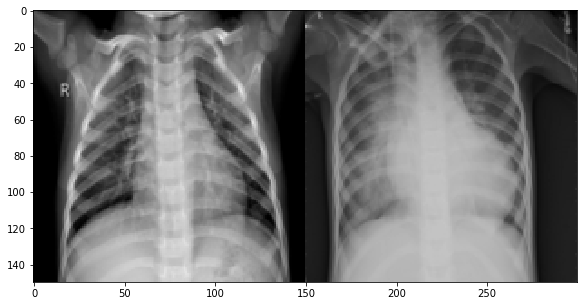

(Left) - No Pneumonia Vs (Right) - Pneumonia


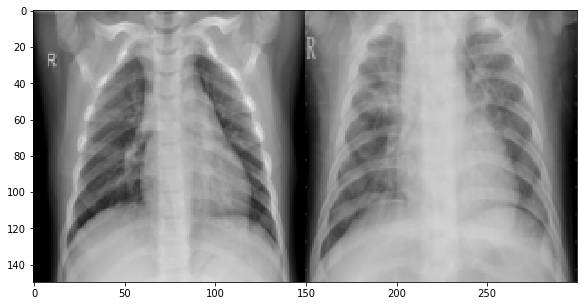

(Left) - No Pneumonia Vs (Right) - Pneumonia


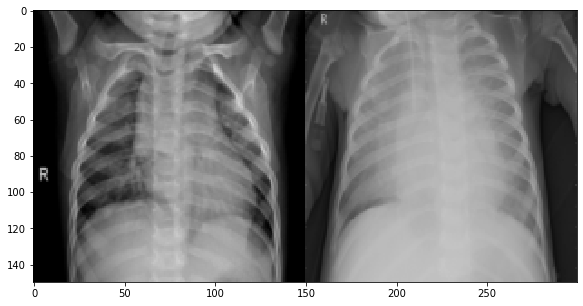

(Left) - No Pneumonia Vs (Right) - Pneumonia


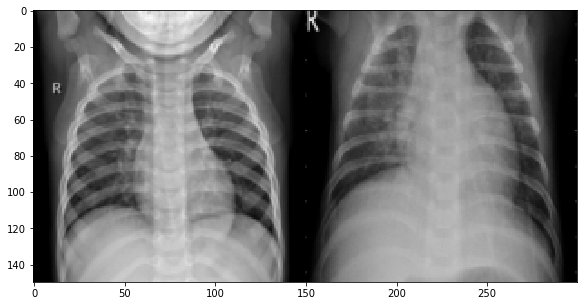

(Left) - No Pneumonia Vs (Right) - Pneumonia


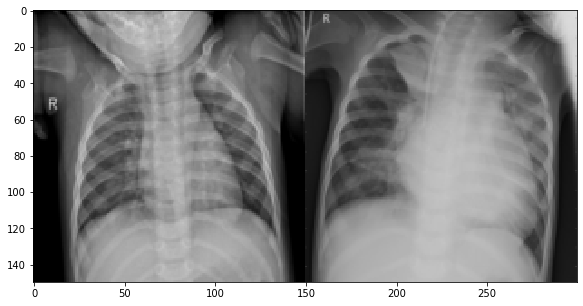

In [14]:
import matplotlib.pyplot as plt
def plotter(i):
    imagep1 = cv2.imread(TRAIN_DIR+"PNEUMONIA/"+Pimages[i])
    imagep1 = skimage.transform.resize(imagep1, (150, 150,3) , mode = 'reflect')
    imagen1 = cv2.imread(TRAIN_DIR+"NORMAL/"+Nimages[i])
    imagen1 = skimage.transform.resize(imagen1, (150, 150,3))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) - No Pneumonia Vs (Right) - Pneumonia")
    
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(5,10):
    plotter(i)

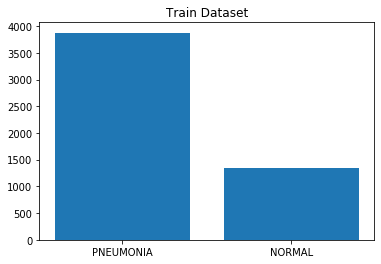

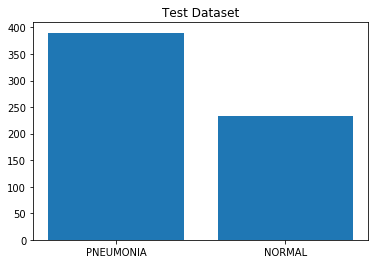

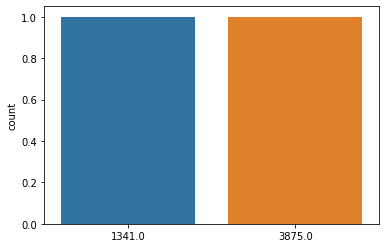

In [15]:
import matplotlib.pyplot as plt
plt.bar(["PNEUMONIA","NORMAL"],[len(Pimages),len(Nimages)])
plt.title("Train Dataset")
plt.show()
Pimages_test=os.listdir(TEST_DIR+"PNEUMONIA")
Nimages_test=os.listdir(TEST_DIR+"NORMAL")
plt.bar(["PNEUMONIA","NORMAL"],[len(Pimages_test),len(Nimages_test)])
plt.title("Test Dataset")
plt.show()

import seaborn as sns
count = y_train.sum(axis = 0)
sns.countplot(x = count)

In [16]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

D:\Users\admin\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [17]:
filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
checkpoint

In [18]:
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
import keras.backend.common as K
K.set_image_dim_ordering('th')
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [19]:
X_train=X_train.reshape(5216,3,150,150)
X_test=X_test.reshape(624,3,150,150)

In [20]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
def swish_activation(x):
    return (K.sigmoid(x) * x)

model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", input_shape=(3,150,150)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding ="same"))


model.add(Conv2D(32, (3, 3), padding="same", input_shape=(3,150,150)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding ="same"))


model.add(Conv2D(64, (3, 3), padding="same", input_shape=(3,150,150)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding ="same"))


model.add(Conv2D(96, (3, 3), padding="same", input_shape=(3,150,150)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(96, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding ="same"))

model.add(Conv2D(128, (3, 3), padding="same", input_shape=(3,150,150)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding ="same"))

model.add(Flatten())

model.add(Dense(64, activation="sigmoid"))
model.add(Dropout(0.4))
model.add(Dense(2 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(lr=0.00005),
                  metrics=['accuracy'])

print(model.summary())


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 3, 150, 16)        21616     
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 150, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 3, 150, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 150, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 150, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 3, 150, 16)        0         
_________________________

In [21]:

batch_size = 256
epochs = 4

In [22]:

history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,callbacks=[lr_reduce,checkpoint] ,
          epochs=epochs)


Train on 5216 samples, validate on 624 samples
Epoch 1/4
5216/5216 [==============================] - 61s 12ms/step - loss: 0.4295 - accuracy: 0.8114 - val_loss: 0.6942 - val_accuracy: 0.6250
Epoch 2/4


D:\Users\admin\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
D:\Users\admin\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


5216/5216 [==============================] - 56s 11ms/step - loss: 0.2330 - accuracy: 0.9227 - val_loss: 0.9245 - val_accuracy: 0.6282
Epoch 3/4
5216/5216 [==============================] - 57s 11ms/step - loss: 0.1758 - accuracy: 0.9457 - val_loss: 0.4664 - val_accuracy: 0.7965
Epoch 4/4
5216/5216 [==============================] - 56s 11ms/step - loss: 0.1546 - accuracy: 0.9530 - val_loss: 0.5821 - val_accuracy: 0.7620


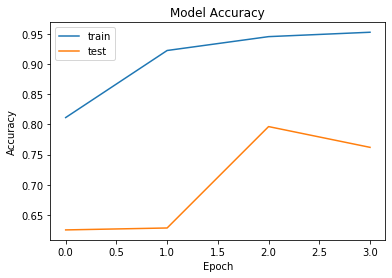

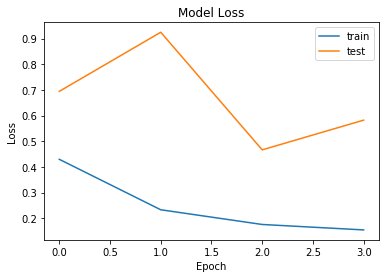

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

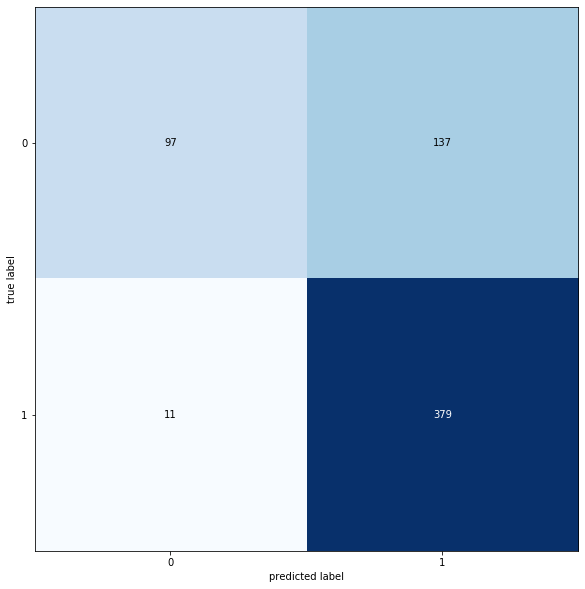

In [25]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10, 10))
plt.show()

In [74]:
print(os.listdir("chest_xray/chest_xray/check"))
CHECK_DIR="chest_xray/chest_xray/check/";
import h5py
from keras .utils.np_utils import to_categorical
NUM_CLASSES=2
IMAGE_DIMS=(150,150,3)
file_name="X_check.h5"
try:
    with h5py.File(file_name) as hf:
        X_check,y_check=hf["imgs"][:],hf["labels"][:]
    print ("loaded image from {}".format(file_name))
except(IOError,OSError,KeyError):
    print("Error in reading {} . Processing all images..." .format(file_name))
    X_check,y_check=get_data(CHECK_DIR)
#     y_test=to_categorical(y_test,NUM_CLASSES)
    with h5py.File(file_name,"w") as hf:
        hf.create_dataset("imgs",data=X_test)
#         hf.create_dataset("labels",data=y_test)

['check']


D:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:9: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  if __name__ == '__main__':
  0%|          | 0/1 [00:00<?, ?it/s]

Error in reading X_check.h5 . Processing all images...


100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


In [75]:
X_check=X_check.reshape(1,3,150,150)

In [76]:
pred = model.predict(X_check);
pred


array([[0.47921786, 0.5281227 ]], dtype=float32)